In [21]:
from keras.datasets import imdb

In [22]:
(train_data, train_labels) , (test_data, test_labels) = imdb.load_data(num_words=10000)

In [23]:
len(train_data[0])

218

In [24]:
test_labels[0]

0

## Decoding the words

In [25]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

## Preparing the data

In [26]:
import numpy as np

In [27]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [28]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [29]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Building the Network

A  type  of  network  that  performs  well  on  such  a  problem  is a simple  stack  of  fully  connected  (Dense)  layers with relu activations: Dense(NOHU,activation='relu').

Having  more  hidden  units  (a higher-dimensional representation  space) allows your network to learn more-complex representations, but it makes the network more  computationally  expensive  and  may  lead to  learning  unwanted  patterns  (patterns that will improve performance on the training data but not on the test data

In [30]:
from keras import models, layers

In [31]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Choosing Loss Function
Crossentropy is usually the best choice when you’re dealing
with models that output probabilities. Crossentropy
is a quantity from the field of Information Theory that measures the distance between probability distributions or, in this case, between the ground-truth distribution and your predictions.

In [32]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy'
             ,metrics = ['accuracy'])

### Configuring the optimizer, using custom losses and metrics

In [33]:
from keras import optimizers, losses, metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

### Validating our approach

In [34]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [35]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy'
             ,metrics = ['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.4976 - acc: 0.7953 - val_loss: 0.3717 - val_acc: 0.8723
Epoch 2/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.2957 - acc: 0.9046 - val_loss: 0.2990 - val_acc: 0.8909
Epoch 3/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.2160 - acc: 0.9285 - val_loss: 0.3087 - val_acc: 0.8715
Epoch 4/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.1742 - acc: 0.9432 - val_loss: 0.2831 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.1414 - acc: 0.9543 - val_loss: 0.2863 - val_acc: 0.8850
Epoch 6/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.1143 - acc: 0.9652 - val_loss: 0.3091 - val_acc: 0.8808
Epoch 7/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.0970 - acc: 0.9709 - val_loss: 0.3147 - 

In [36]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

## Plotting the training and Validation Loss (Overfitting)

In [37]:
import matplotlib.pyplot as plt

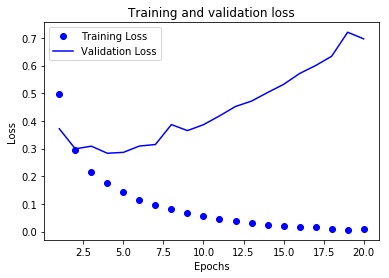

In [38]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plotting the training and validation accuracy

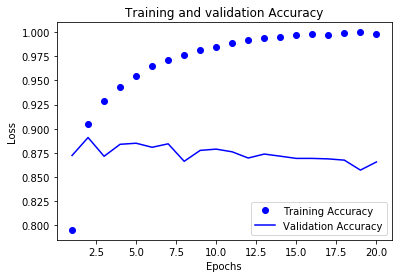

In [39]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Retraining the model from scratch

In [40]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 77us/step - loss: 0.4750 - acc: 0.8218
Epoch 2/4
25000/25000 [==============================] - 2s 67us/step - loss: 0.2657 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 2s 67us/step - loss: 0.1983 - acc: 0.9297
Epoch 4/4
25000/25000 [==============================] - 1s 56us/step


In [42]:
results

[0.32381630864143374, 0.87336]

In [43]:
model.predict(x_test)

array([[0.13935593],
       [0.9996971 ],
       [0.2926325 ],
       ...,
       [0.07119244],
       [0.04315602],
       [0.4702107 ]], dtype=float32)